In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score

In [2]:
#load data
df = pd.read_csv('/content/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

##Data Cleaning

Check the missing value and dulicates

In [4]:
df.info() # no missing value
# note: total charges is actually numeric but stored as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
# double check missing value
df.isna().sum() 

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
# check totalcharges that is numeric but stored as string
df.value_counts('totalcharges') 
# we found 11 empty string which caused a failure when transforming data
# since 11 is insignificant, we can drop the missing value

totalcharges
           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
260.8       1
260.7       1
2599.95     1
2598.95     1
999.9       1
Length: 6531, dtype: int64

In [7]:
(df['totalcharges'].values == ' ').sum() # next time, when trying to convert string to float and it fails, assume there is empty string by using this

11

In [8]:
# drop missing values in totalcharges
df_missingval = (df[df['totalcharges']==' '].index.values)
df = df.drop(index = df_missingval)
df.index.size # our new observation

7032

In [9]:
# transform total charge from string to float
df['totalcharges'] = df['totalcharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [10]:
# check duplicate
df.duplicated().sum() # no duplicate

0

##Exploratory data analysis (EDA) with data visualization

Data visualization helps to understand why customers stops using the service. Steps in this process are:


1.   Deep dive to understand the data
2.   Visualize demography and service variables against churn

In [11]:
df['phoneservice'] = df['phoneservice'].astype('category')
df['multiplelines'] = df['multiplelines'].astype('category')
df['internetservice'] = df['internetservice'].astype('category')
df['onlinesecurity'] = df['onlinesecurity'].astype('category')
df['onlinebackup'] = df['onlinebackup'].astype('category')
df['deviceprotection'] = df['deviceprotection'].astype('category')
df['techsupport'] = df['techsupport'].astype('category')
df['streamingtv'] = df['streamingtv'].astype('category')
df['streamingmovies'] = df['streamingmovies'].astype('category')
df['paperlessbilling'] = df['paperlessbilling'].astype('category')
df['contract'] = df['contract'].astype('category')
df['paymentmethod'] = df['paymentmethod'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   seniorcitizen     7032 non-null   int64   
 3   partner           7032 non-null   object  
 4   dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   phoneservice      7032 non-null   category
 7   multiplelines     7032 non-null   category
 8   internetservice   7032 non-null   category
 9   onlinesecurity    7032 non-null   category
 10  onlinebackup      7032 non-null   category
 11  deviceprotection  7032 non-null   category
 12  techsupport       7032 non-null   category
 13  streamingtv       7032 non-null   category
 14  streamingmovies   7032 non-null   category
 15  contract          7032 non-null   category
 16  paperlessbilling  7032 n

In [12]:
df.value_counts('internetservice') 
# 680 doesnot have phoneservice, and thus internet service is calculated from people who use phoneservice
# 1526 people do not have internet service, and thus other service exclude these people
# the sequence of service that people use are: phoneservice, internetservice, and other service

internetservice
Fiber optic    3096
DSL            2416
No             1520
dtype: int64

In [13]:
service = {'phoneservice': {'Yes': 1, 'No': 0},
                'multiplelines': {'Yes': 1, 'No': 0, 'No phone service':None}, 
                'onlinesecurity': {'Yes': 1, 'No': 0, 'No internet service': None},
                'onlinebackup': {'Yes': 1, 'No': 0, 'No internet service': None},
                'deviceprotection': {'Yes': 1, 'No': 0, 'No internet service': None},
                'techsupport': {'Yes': 1, 'No': 0, 'No internet service': None},
                'internetservice': {'Fiber optic': 1, 'DSL': 0, 'No': None},
                'streamingtv': {'Yes': 1, 'No': 0, 'No internet service': None},
                'streamingmovies': {'Yes': 1, 'No': 0, 'No internet service': None},
                'churn': {'Yes': 1, 'No': 0}} # multiplelines, the missing value is no phone service 
df = df.replace(service)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,NaN,0.0,1.0,...,1.0,1.0,0.0,0.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   seniorcitizen     7032 non-null   int64   
 3   partner           7032 non-null   object  
 4   dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   phoneservice      7032 non-null   int64   
 7   multiplelines     6352 non-null   float64 
 8   internetservice   5512 non-null   float64 
 9   onlinesecurity    5512 non-null   float64 
 10  onlinebackup      5512 non-null   float64 
 11  deviceprotection  5512 non-null   float64 
 12  techsupport       5512 non-null   float64 
 13  streamingtv       5512 non-null   float64 
 14  streamingmovies   5512 non-null   float64 
 15  contract          7032 non-null   category
 16  paperlessbilling  7032 n

In [15]:
columns_list = ['phoneservice','multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'internetservice', 'streamingtv', 'streamingmovies']
df['tot_service'] = df[columns_list].sum(axis=1)
df.head()
# this new variable shows the total service a customer has

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tot_service
0,7590-VHVEG,Female,0,Yes,No,1,0,NaN,0.0,0.0,...,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,29.85,29.85,0,1.0
1,5575-GNVDE,Male,0,No,No,34,1,0.0,0.0,1.0,...,0.0,0.0,0.0,One year,No,Mailed check,56.95,1889.50,0,3.0
2,3668-QPYBK,Male,0,No,No,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,Month-to-month,Yes,Mailed check,53.85,108.15,1,3.0
3,7795-CFOCW,Male,0,No,No,45,0,NaN,0.0,1.0,...,1.0,0.0,0.0,One year,No,Bank transfer (automatic),42.30,1840.75,0,3.0
4,9237-HQITU,Female,0,No,No,2,1,0.0,1.0,0.0,...,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,70.70,151.65,1,2.0


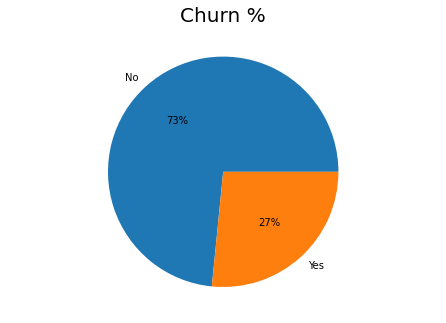

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Churn %", fontsize=20)
plt.show()

In [17]:
df['paperlessbilling'].value_counts()

Yes    4168
No     2864
Name: paperlessbilling, dtype: int64

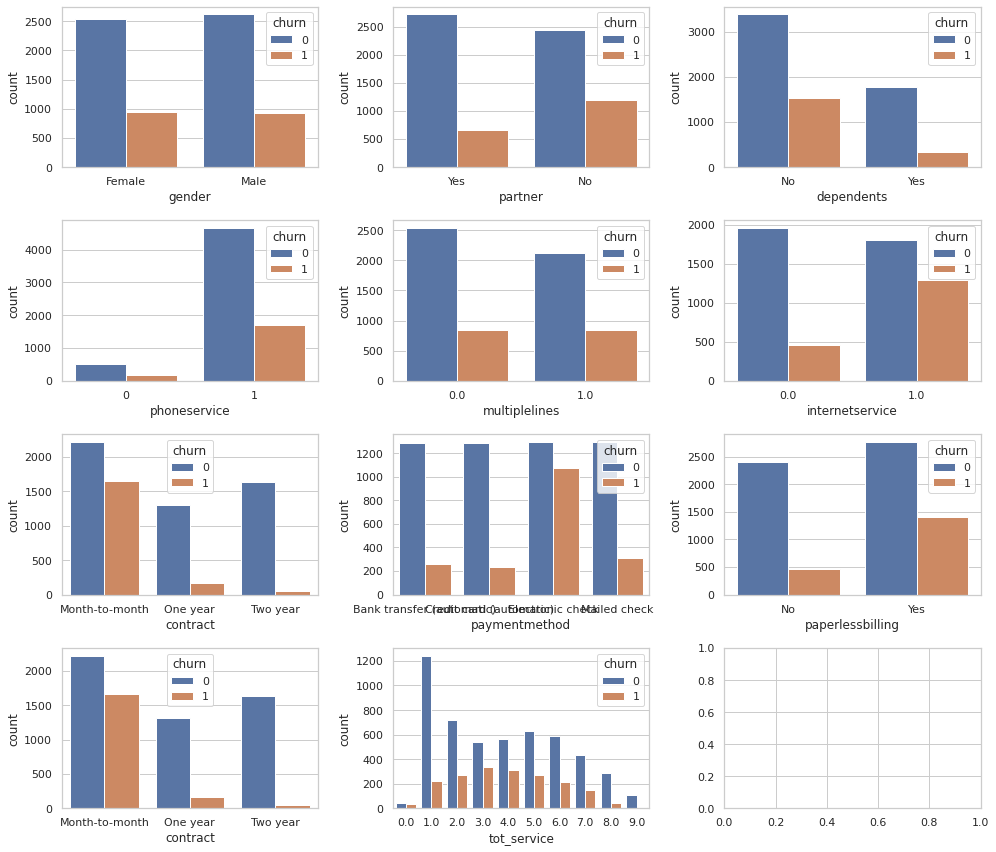

In [18]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(4, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='churn', ax=ax[0][0])
sns.countplot(data=df, x='partner', hue='churn', ax=ax[0][1])
sns.countplot(data=df, x='dependents', hue='churn', ax=ax[0][2])
sns.countplot(data=df, x='phoneservice', hue='churn', ax=ax[1][0])
sns.countplot(data=df, x='multiplelines', hue='churn', ax=ax[1][1])
sns.countplot(data=df, x='internetservice', hue='churn', ax=ax[1][2])
sns.countplot(data=df, x='contract', hue='churn', ax=ax[2][0])
sns.countplot(data=df, x='paymentmethod', hue='churn', ax=ax[2][1])
sns.countplot(data=df, x='paperlessbilling', hue='churn', ax=ax[2][2])
sns.countplot(data=df, x='contract', hue='churn', ax=ax[3][0])
sns.countplot(data=df, x='tot_service', hue='churn', ax=ax[3][1])

plt.tight_layout()
plt.show()
# from these bar, it seems customers who stop using the service are: 
# not in a relationship, single, has contract in month-to-basis with paperless billing

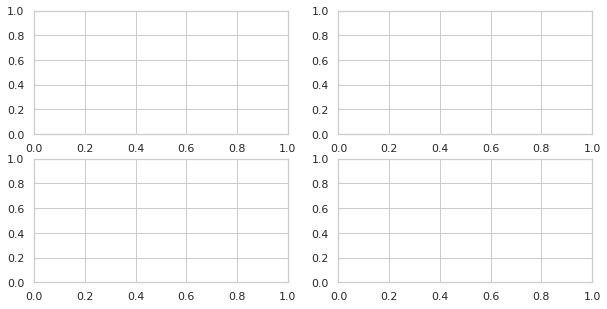

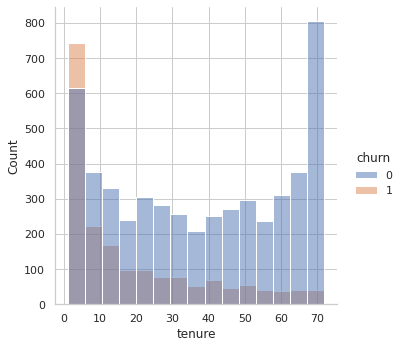

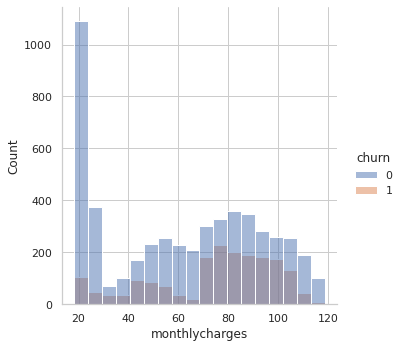

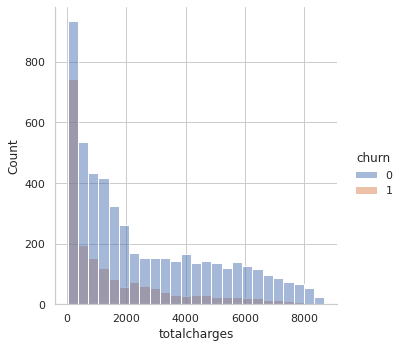

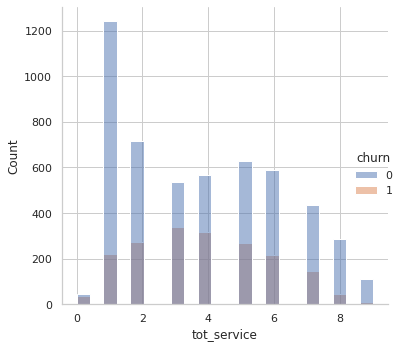

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
sns.displot(x=df['tenure'],hue=df['churn'], ax=ax[0][0])
sns.displot(x=df['monthlycharges'],hue=df['churn'], ax=ax[0][1])
sns.displot(x=df['totalcharges'],hue=df['churn'], ax=ax[1][0])
sns.displot(x=df['tot_service'],hue=df['churn'], ax=ax[1][1])

plt.tight_layout()
plt.show()

In [20]:
df['phoneservice'] = df['phoneservice'].astype('category')
df['multiplelines'] = df['multiplelines'].astype('category')
df['internetservice'] = df['internetservice'].astype('category')
df['onlinesecurity'] = df['onlinesecurity'].astype('category')
df['onlinebackup'] = df['onlinebackup'].astype('category')
df['deviceprotection'] = df['deviceprotection'].astype('category')
df['techsupport'] = df['techsupport'].astype('category')
df['streamingtv'] = df['streamingtv'].astype('category')
df['streamingmovies'] = df['streamingmovies'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   seniorcitizen     7032 non-null   int64   
 3   partner           7032 non-null   object  
 4   dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   phoneservice      7032 non-null   category
 7   multiplelines     6352 non-null   category
 8   internetservice   5512 non-null   category
 9   onlinesecurity    5512 non-null   category
 10  onlinebackup      5512 non-null   category
 11  deviceprotection  5512 non-null   category
 12  techsupport       5512 non-null   category
 13  streamingtv       5512 non-null   category
 14  streamingmovies   5512 non-null   category
 15  contract          7032 non-null   category
 16  paperlessbilling  7032 n

In [21]:
cats=['gender','partner', 'dependents', 'seniorcitizen']
service=['phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']
nums=['tenure', 'monthlycharges', 'totalcharges', 'tot_service']

In [22]:
# Statistical summary 
df[nums].describe()
# ANALYSIS:
# a. The the three variables are not normally distributed/skewed as there are discrepancies found between their mean and median
# b. Minimum and maximum values seem reasonable 
# c. To ensure the distribution, use kernel for univariate analysis in 2c

,tenure,monthlycharges,totalcharges,tot_service
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,3.803612
std,24.545260,30.085974,2266.771362,2.284171
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,2.000000
50%,29.000000,70.350000,1397.475000,4.000000
75%,55.000000,89.862500,3794.737500,6.000000
max,72.000000,118.750000,8684.800000,9.000000


In [23]:
# Statistical summary 
df[cats].describe()
# ANALYSIS
# a. the majority of customers' demograpy is male, single, in a productive age, and without dependents

,seniorcitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [24]:
# Statistical summary 
df[service].describe()
# ANALYSIS
# a. Services that are used the most are phoneservice and internetservice

,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7032,6352.0,5512.0,5512.0,5512.0,5512.0,5512.0,5512.0,5512.0,7032,7032,7032
unique,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2,4
top,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,Yes,Electronic check
freq,6352,3385.0,3096.0,3497.0,3087.0,3094.0,3472.0,2809.0,2781.0,3875,4168,2365


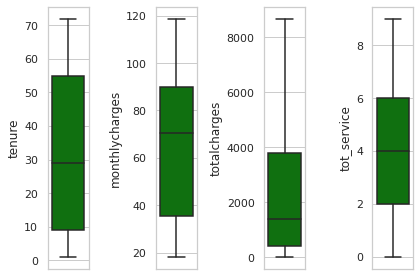

In [25]:
# Univariate analysis
# Boxplot to check dispersment and outliers
features = nums
for i in range (0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green')
  plt.tight_layout()
  # ANALYSIS:
  # No outliers apparently

<Figure size 864x432 with 0 Axes>

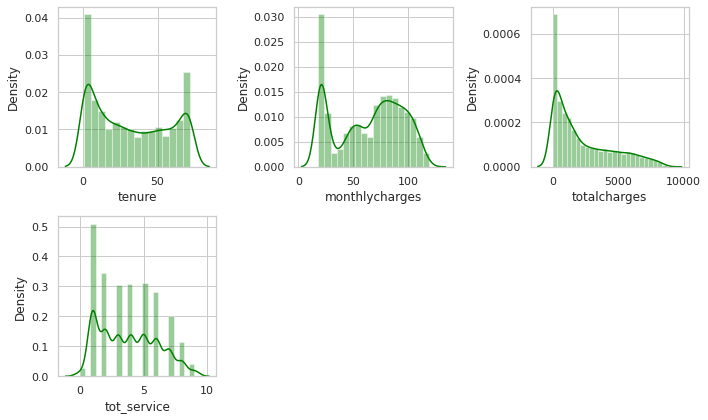

In [26]:
# Univariate analysis
# KDE plot to check the distribution
plt.figure(figsize=(12,6))

features = nums
plt.figure(figsize=(10,6))
for i in range(0, len(features)):
  plt.subplot(2, len(features)//2 + 1, i+1)
  sns.distplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

# ANALYSIS
# a. The variables are not normally distributed/positively skewed and two variables have more than one peaks

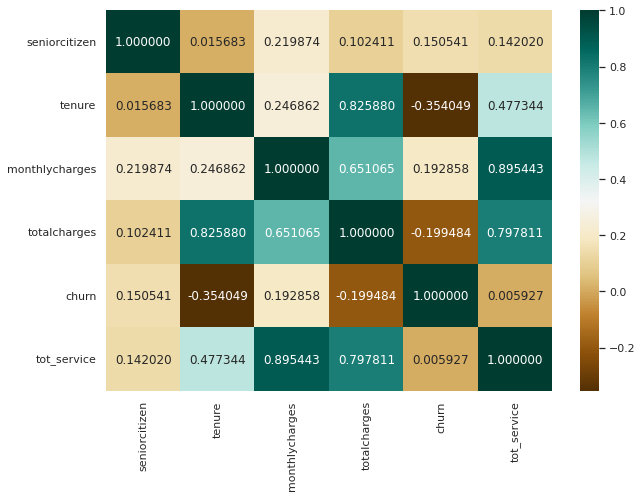

In [28]:
# Multivariate analysis
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, fmt='2f', cmap='BrBG')
# ANALYSIS
# a. tot_service and monthlycharges, as well as tot_service and totalcharges have strong correlation which is reasonable
# b. totalcharges and tenure also has pretty high correlation
# c. interestingly, churn has negative and mild correlation with tenure

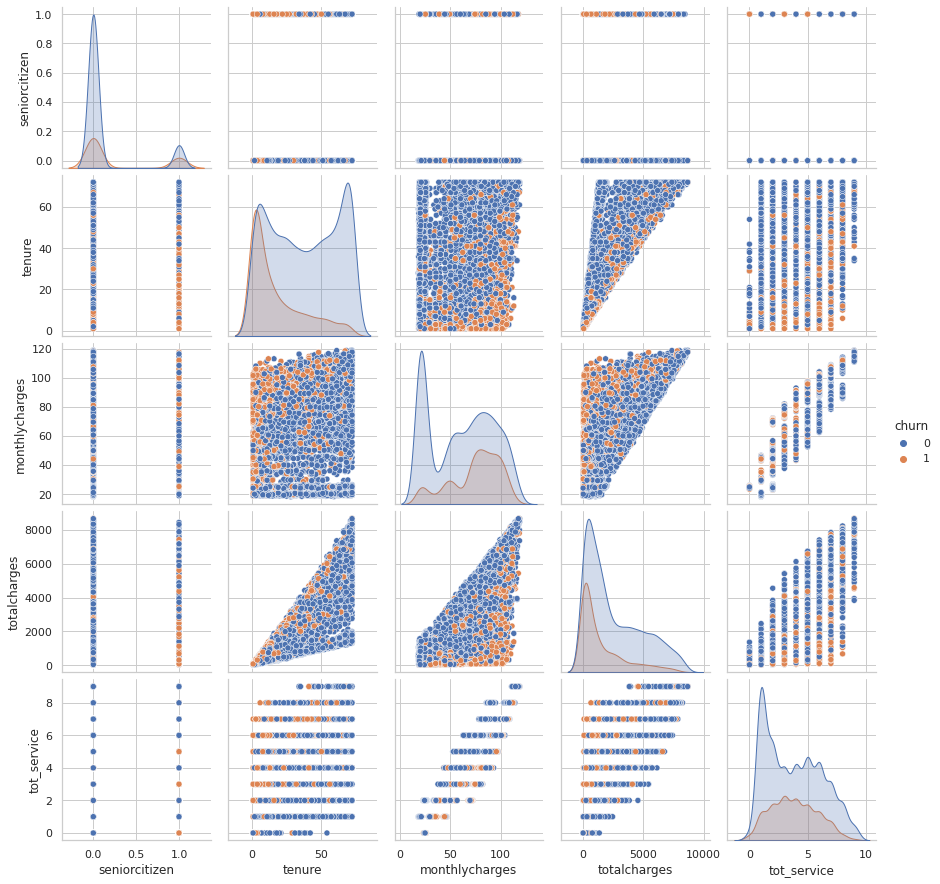

In [29]:
sns.pairplot(df, hue='churn')
# ANALYSIS
# a. I used churn as the hue parameter, to explains the reasons people stop using the service
# b. It seems customers who stop using the service are likely to be a senior citizen with relatively short years of working, and relatively high bills

**Deep-dive exploration**

In [30]:
#Q1: Why people stop using the service?
pd.pivot_table(df, index='churn', aggfunc='mean')
# Analysis
# those who stop using the service have relatively higher monthly bills, senior citizen, and have shorter years of tenure

,monthlycharges,seniorcitizen,tenure,tot_service,totalcharges
churn,,,,,
0,61.307408,0.128995,37.650010,3.795468,2555.344141
1,74.441332,0.254682,17.979133,3.826110,1531.796094


In [31]:
# Q2:What are the characteristics of those stopping the service?
pd.pivot_table(df, index='churn', columns=('gender', 'partner', 'dependents'), aggfunc='mean')
# Analysis
# a. Accross characteristics, those who stop using the service have relatively higher monthly bills and shorter years of tenure

monthlycharges                                              \
gender             Female                                        Male   
partner                No                   Yes                    No   
dependents             No        Yes         No        Yes         No   
churn                                                                   
0               59.669663  52.504911  71.630097  57.675469  57.074197   
1               73.475213  67.748485  81.432620  73.143939  70.103918   

                                            seniorcitizen            ...  \
gender                                             Female            ...   
partner                      Yes                       No            ...   
dependents        Yes         No        Yes            No       Yes  ...   
churn                                                                ...   
0           46.805294  73.170650  59.756309      0.148876  0.017857  ...   
1           63.631818  83.446137  77.468803      0.269165  0.030303  ...   

           tot_service           totalcharges                            \
gender            Male                 Female                             
partner            Yes                     No                       Yes   
dependents          No       Yes           No          Yes           No   
churn                                                                     
0             4.730081  3.928859  1978.217135  1359.351339  3623.278964   
1             4.609442  4.316239  1079.102385   944.440909  2311.314973   

                                                                             
gender                          Male                                         
partner                           No                       Yes               
dependents          Yes           No          Yes           No          Yes  
churn                                                                        
0           2808.451475  1776.013682  1540.191176  3648.989593  2891.177651  
1           1941.395455  1124.731530   893.650000  2546.501502  2344.748718  

[2 rows x 40 columns]

In [32]:
# Q2:What are the characteristics of those stopping the service?
(df.groupby(['churn', 'gender', 'partner', 'dependents']).size())
# Analysis combined from the previous table
# a. both male and female with no partner and dependent and have relatively higher monthly charges would likely to stop

churn  gender  partner  dependents
0      Female  No       No            1068
                        Yes            112
               Yes      No             618
                        Yes            746
       Male    No       No            1089
                        Yes            170
               Yes      No             615
                        Yes            745
1      Female  No       No             587
                        Yes             33
               Yes      No             187
                        Yes            132
       Male    No       No             536
                        Yes             44
               Yes      No             233
                        Yes            117
dtype: int64

**END**